In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

import pickle

### Import complete dataset

In [4]:
df=pd.read_pickle('./data/airbnbAmenities_coded.pkl')

In [5]:
df.head(5)

,number_of_reviews,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,security_deposit,ppl_bath,guest_prop,bnb_yield,DateDiffHostSince,dist_transit,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with bath chair,Beach essentials,Beachfront,Bed linens,Breakfast,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Electric profiling bed,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to front door,Free parking on premises,Free street parking,Game console,Garden or backyard,Ground floor access,Gym,Hair dryer,Handheld shower head,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Mobile hoist,Other,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Pool with pool hoist,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski in/Ski out,Smart lock,Smoke detector,Smoking allowed,Stair gates,Step-free access,Stove,Suitable for events,TV,Table corner guards,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower,Wide doorway,Wide entryway,Wide hallway clearance,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op Cit

#### Import the neighbourhoods as a seperate data set

In [8]:
df_loc =pd.read_pickle('./data/airbnbNYCclean.pkl')

In [9]:
df_loc


,description,number_of_reviews,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,security_deposit,amenities,house_rules,host_since,host_is_superhost,cancellation_policy,neighbourhood_cleansed,reviews_per_month,latitude,longitude,bed_type,ppl_bath,guest_prop,bnb_yield,tier,tier_price,DateDiffHostSince,Location,dist_transit
0,Step into our artistic spacious apartment and ...,168.0,Apartment,Private room,3.0,1.0,1.0,2.0,119.0,2.0,39.0,2.0,0.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",no-smoking/please take off your shoes: cleanin...,2008-09-06,f,strict_14_with_grace_period,Harlem,1.43,40.799205,-73.953676,Real Bed,0.500000,0.666667,17425.408,2nd,3rd,3601.0,"(40.79920479936168, -73.95367574543542)",0.115468
1,Renovated apt home in elevator building. Spaci...,7.0,Apartment,Private room,4.0,1.0,2.0,3.0,104.0,1.0,25.0,1.0,100.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-The security and comfort of all our guests is...,2008-09-07,t,moderate,Kensington,0.23,40.647486,-73.972370,Real Bed,1.000000,0.250000,2449.408,3rd,3rd,3600.0,"(40.64748608166989, -73.97236954007957)",0.392200
2,"Find your romantic getaway to this beautiful, ...",32.0,Apartment,Entire home/apt,2.0,1.0,0.0,1.0,325.0,2.0,0.0,1.0,350.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...","Make yourself at home, respect the space and t...",2008-09-09,f,strict_14_with_grace_period,Midtown,0.31,40.753621,-73.983774,Real Bed,0.500000,1.000000,10316.800,3rd,1st,3598.0,"(40.753620726572464, -73.98377381114605)",0.085077
3,"This is a spacious, clean, furnished master be...",32.0,Apartment,Private room,2.0,1.0,1.0,1.0,195.0,2.0,50.0,5.0,150.0,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",Guests should be respectful of the home and th...,2008-11-09,f,strict_14_with_grace_period,Williamsburg,0.31,40.708558,-73.942362,Real Bed,0.500000,1.000000,6190.080,3rd,2nd,3537.0,"(40.70855778333159, -73.94236227640226)",0.216335
4,Urban retreat: enjoy 500 s.f. floor in 1899 br...,198.0,Other,Entire home/apt,3.0,1.0,1.0,3.0,89.0,1.0,0.0,1.0,500.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Smoking - outside please; pets allowed but ple...,2008-12-07,f,moderate,Clinton Hill,4.42,40.685138,-73.959757,Real Bed,1.000000,0.333333,40282.112,2nd,3rd,3509.0,"(40.68513770564301, -73.95975749881094)",0.403653
5,"My place is close to Katz's Delicatessen, Stat...",3.0,Apartment,Entire home/apt,2.0,1.0,2.0,2.0,105.0,2.0,20.0,1.0,150.0,"{Internet,Wifi,Kitchen,Breakfast,Heating,""Smok...",- Please take off your shoes at the door and k...,2008-12-28,f,moderate,East Village,1.20,40.720665,-73.979843,Real Bed,0.500000,1.000000,12902.400,2nd,3rd,3488.0,"(40.72066466596736, -73.9798430342775)",0.667301
6,In the heart of it all! Message me about avai...,26.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,200.0,1.0,0.0,2.0,0.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Keep things clean and orderly and quiet please...,2009-01-26,f,strict_14_with_grace_period,Hell's Kitchen,0.25,40.762600,-73.993045,Real Bed,1.000000,0.333333,5120.000,3rd,2nd,3459.0,"(40.76260047297085, -73.99304499336237)",0.524306
7,My large 1 bedroom apartment has a true New Yo...,65.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,285.0,2.0,75.0,2.0,250.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",• Check-in time is 2PM. • Check-out time is 12...,2009-02-02,f,strict_14_with_grace_period,Murray Hill,0.59,40.747672,-73.974997,Real Bed,0.500000,1.000000,17218.560,2nd,1st,3452.0,"(40.74767176908579, -73.97499733931186)",0.353580
8,"Quiet, very small one bedroom apartment in Mur...",69.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,219.0,2.0,0.0,3.0,200.0,"{Wifi,""Air conditioning"",Kitchen,""Paid parking...",NO SMOKING. EVER. No kids (it’s not suitable)....,2009-02-03,f,strict_14_with_grace_period,Murray Hill,0.62,40.744958,-73.974201,Real Bed,0.500000,1.000000,13903.872,2nd,2nd,3451.0,"(40.74495768021798, -73.9742009976176)",0.6394

In [10]:
locations=df_loc.groupby('neighbourhood_cleansed')

In [13]:
tiers =df_loc.groupby('tier')

In [25]:
round(locations.dist_transit.mean().sort_values(ascending=False).tail(5),2)

neighbourhood_cleansed
Financial District    0.14
Nolita                0.14
NoHo                  0.11
Flatiron District     0.11
Theater District      0.08
Name: dist_transit, dtype: float64

#### Seperating the features by type for better analysis 

In [ ]:
df.columns

In [26]:
#Seperating the categoricals from the dataset
def features_train():
    # Numerical Features
    num_features = df.select_dtypes(exclude=['object']).columns
    num_features = num_features.drop(['price','bnb_yield']) # drop ID and SalePrice

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = features_train()

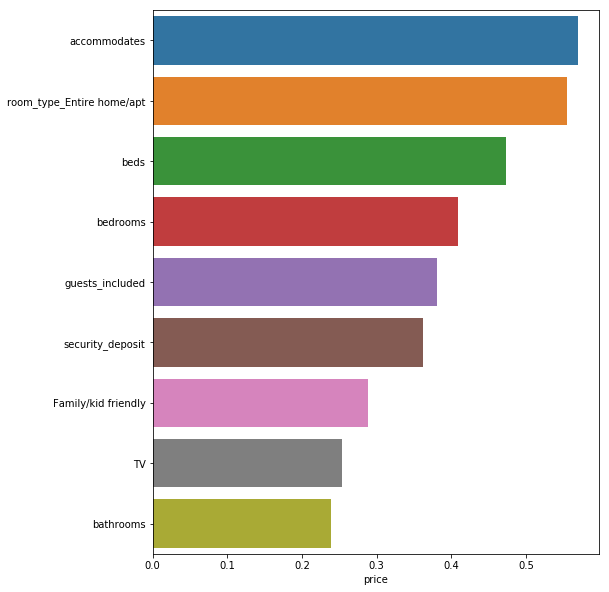

In [36]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = df[['price'] + num_features].corr()
corr = corr.sort_values('price', ascending=False).head(10)
plt.figure(figsize=(8,10))
sns.barplot( corr.price[1:], corr.index[1:], orient='h')
plt.show()

In [ ]:
df[num]

In [ ]:
def corr_map(df, figsize=(20,10), mask_val = None):
    # Make correlation heat map from pandas dataframe
    # pass a value to mask_val to only see correlations
    # above a certain value (the absolute value of the correlation)

    # Arguments:
    # df - pandas dataframe to with data for heatmap
    # figsize - size of resulting figure (width, height), default: (15, 10) (inches?)
    # mask_val - threshold for displaying correlations, default: None

    corr = df.corr()    
    
    # Make mask to only show bottom triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(corr)] = True
    
    # Add to the mask (if mask_val passed)
    if (mask_val != None):
        mask[abs(corr) < mask_val] = True
    
    # Make heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr,vmin=-0.4,vmax=1, mask=mask, annot=True, fmt='.2g')
    pass

In [ ]:
corr_map(df)

In [ ]:
df_1=df.drop(['price'],axis=1)

In [ ]:
corr_map(df_1)

In [ ]:
sns.heatmap(df1.corr()[['bnb_yield']].sort_values(by='bnb_yield', ascending=False))